In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
species = np.unique(df.loc[:,'Species'])
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

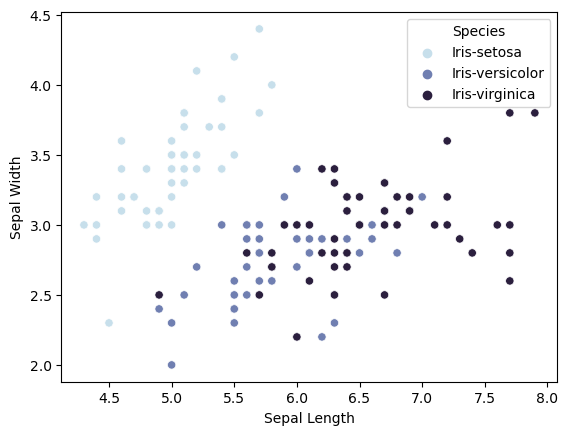

In [7]:
sns.scatterplot(df,x=df.loc[:,'SepalLengthCm'],y=df.loc[:,'SepalWidthCm'],
                hue=df.loc[:,'Species'],palette="ch:s=.25,rot=-.25")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

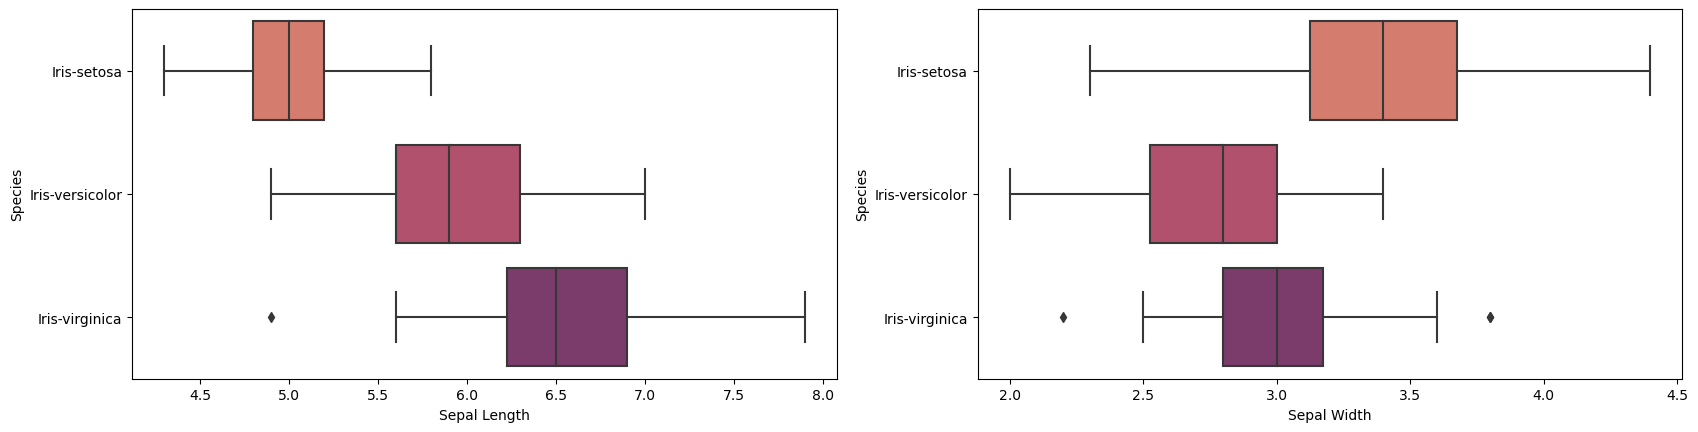

In [8]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(20)

sns.boxplot( x=df.iloc[:,1], y=df.loc[:,'Species'],
            palette="flare", data=df,ax=axes[0])
fig.axes[0].set_xlabel("Sepal Length")

sns.boxplot( x=df.iloc[:,2], y=df.loc[:,'Species'],
            palette="flare", data=df,ax=axes[1])
fig.axes[1].set_xlabel("Sepal Width")

plt.show()

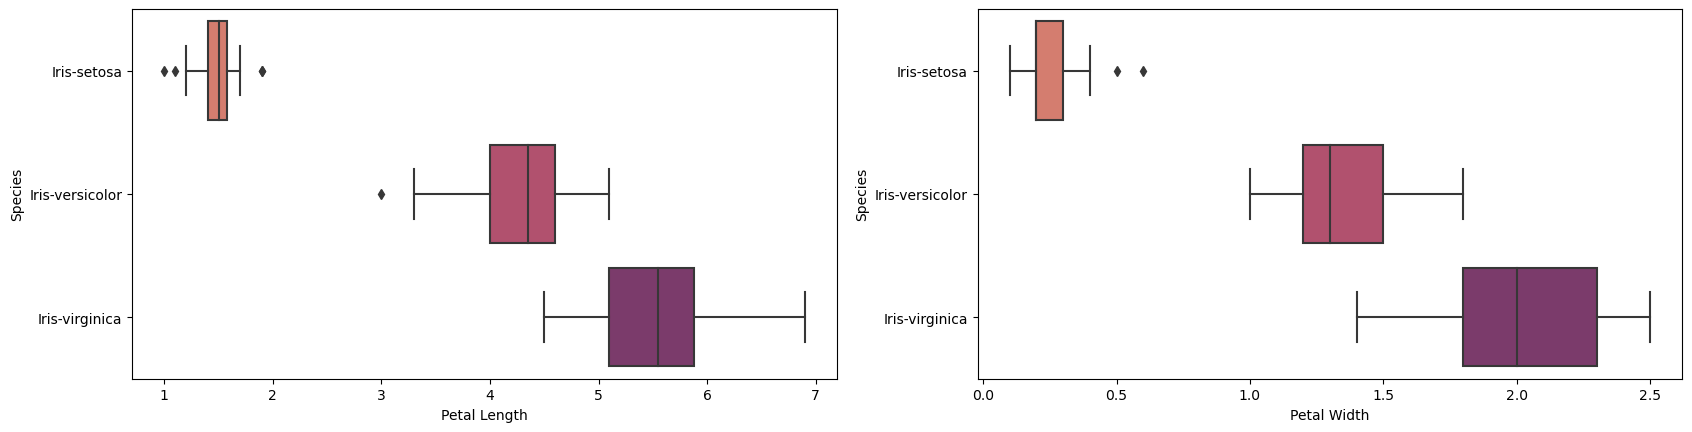

In [9]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(20)
sns.boxplot( x=df.iloc[:,3], y=df.loc[:,'Species'],
            palette="flare", data=df,ax=axes[0])
fig.axes[0].set_xlabel("Petal Length")

sns.boxplot( x=df.iloc[:,4], y=df.loc[:,'Species'],
            palette="flare", data=df,ax=axes[1])
fig.axes[1].set_xlabel("Petal Width")

plt.show()

In [10]:
X = df.iloc[:,1:5]
y = df.iloc[:,5]

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.3, random_state=21)
print(X_train.shape,X_test.shape)

(105, 4) (45, 4)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have already defined X and y

# Step 2: Create and train the KNN classifier
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=3, weights='uniform')

knn.fit(X_train, y_train)

# Step 3: Calculate and print accuracy
acc = knn.score(X_test, y_test)
print("Accuracy:", acc)

Accuracy: 0.9333333333333333


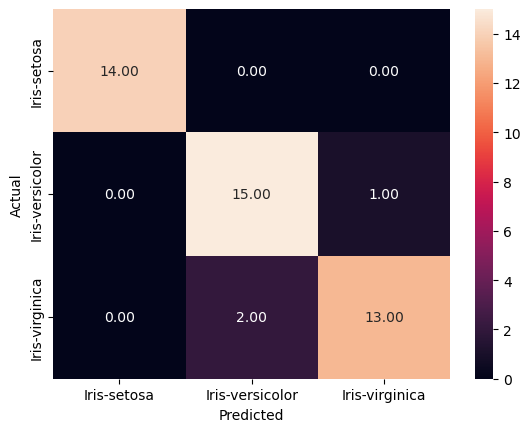

In [12]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, species, species)
sns.heatmap(df_cm, annot = True ,fmt = '.2f')
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.show()

In [13]:
print(classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.88      0.91        17
 Iris-virginica       0.87      0.93      0.90        14

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.94        45
   weighted avg       0.93      0.93      0.93        45

